# Схема базы даных

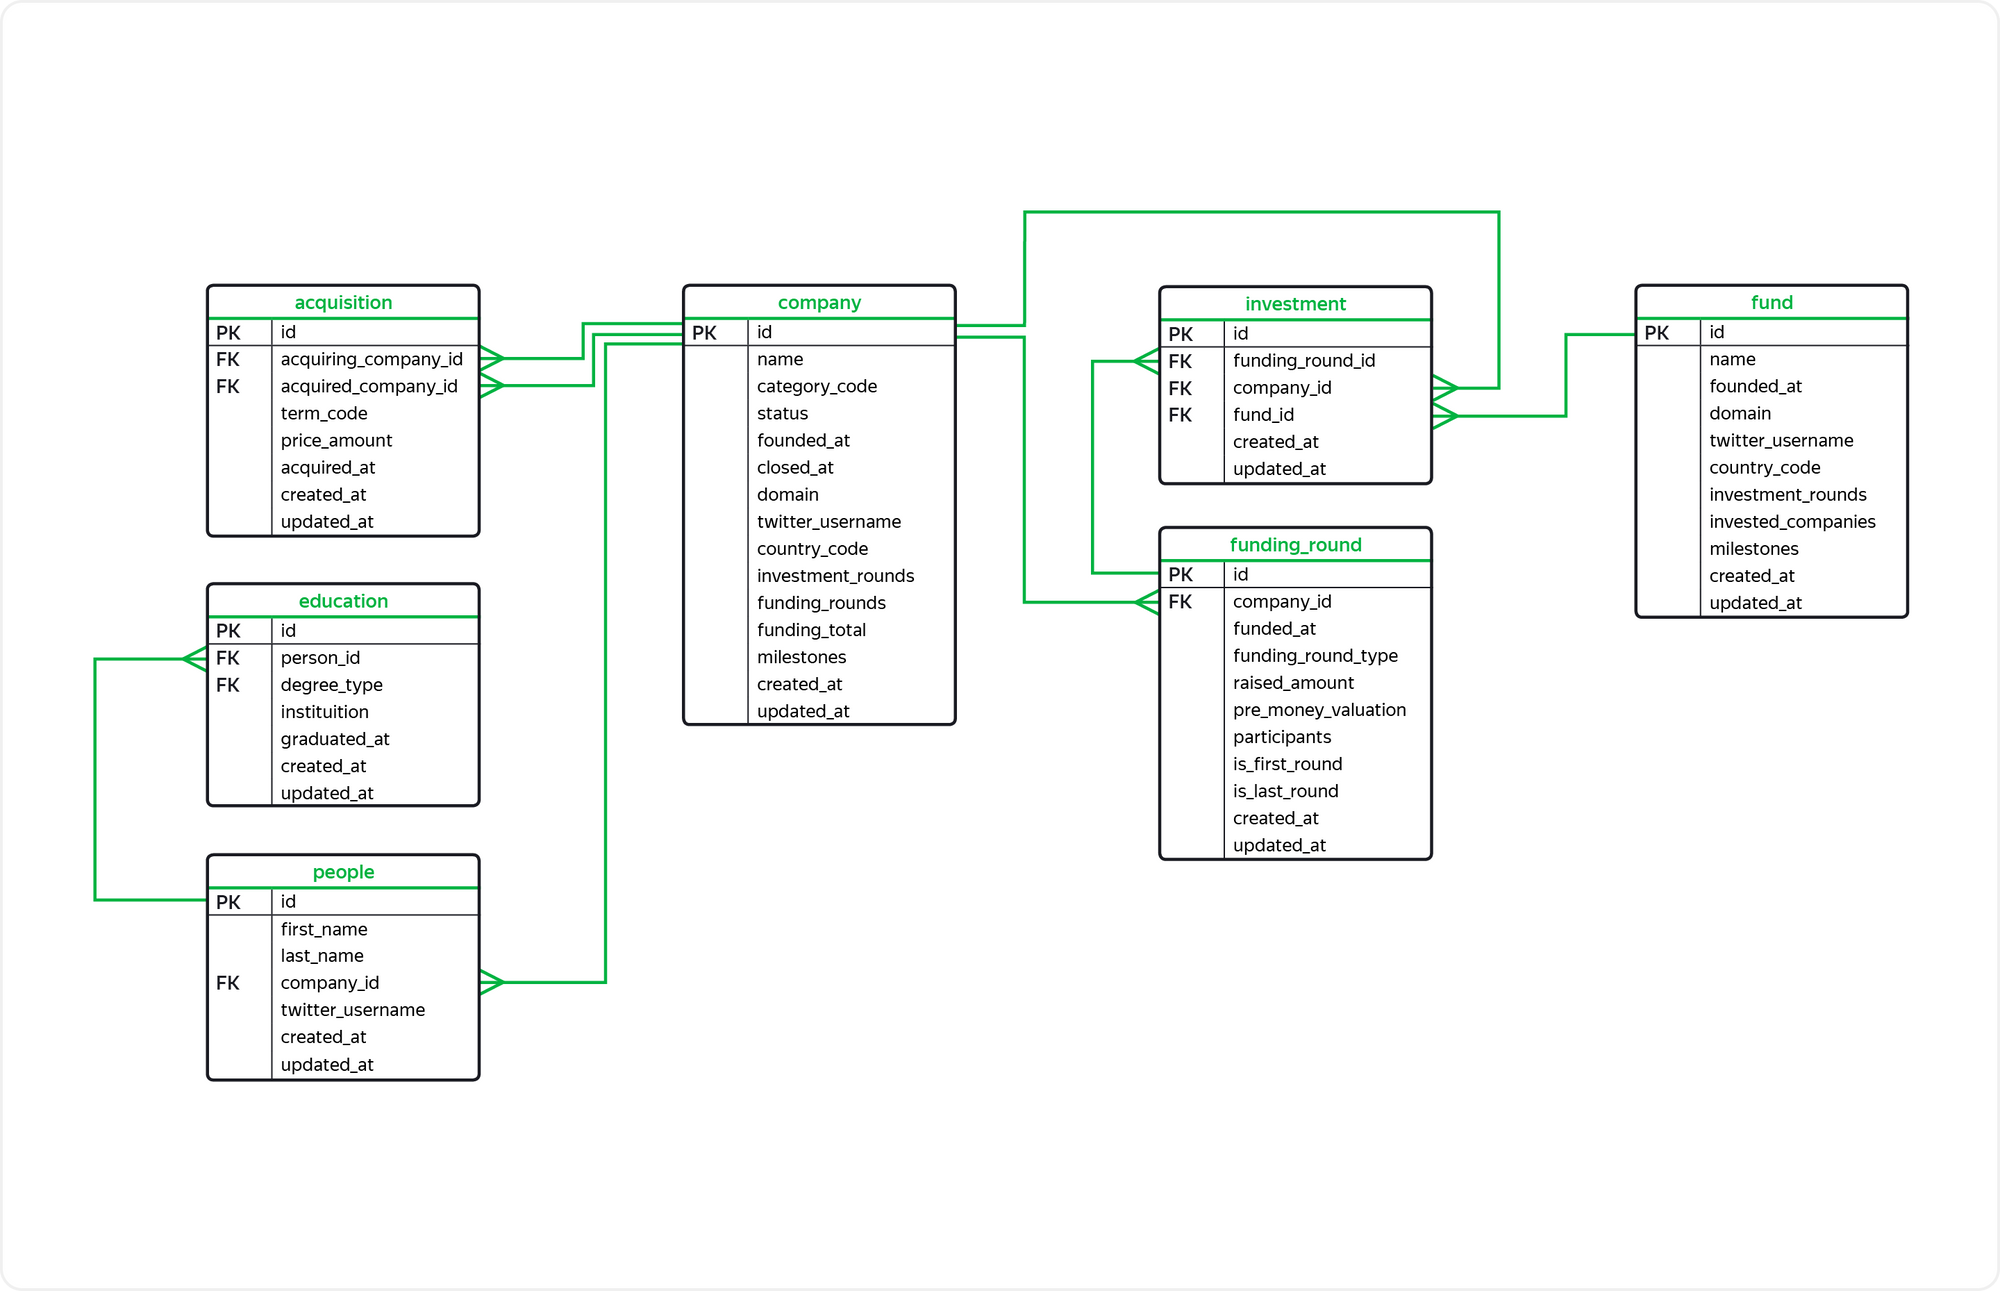

# Описание проекта

Проект автоматически проверяется в тренажёре SQL. В самостоятельном проекте этого курса работа идёт с базой данных, которая хранит информацию о венчурных фондах и инвестициях в компании-стартапы. Эта база данных основана на датасете Startup Investments, опубликованном на популярной платформе для соревнований по исследованию данных Kaggle

# Задачи

## 1/23 Посчитайте, сколько компаний закрылось.

In [ ]:
"SELECT COUNT(*)
FROM company
WHERE status = 'closed'"

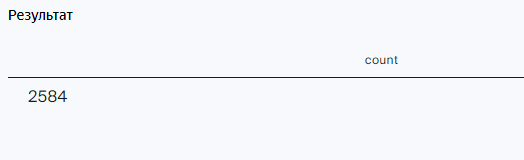

## 2/23 Отобразите количество привлечённых средств для новостных компаний США. Используйте данные из таблицы `company`. Отсортируйте таблицу по убыванию значений в поле `funding_total` .

In [ ]:
'''
SELECT funding_total
FROM company
WHERE category_code = 'news' AND country_code = 'USA'
ORDER BY funding_total DESC
'''

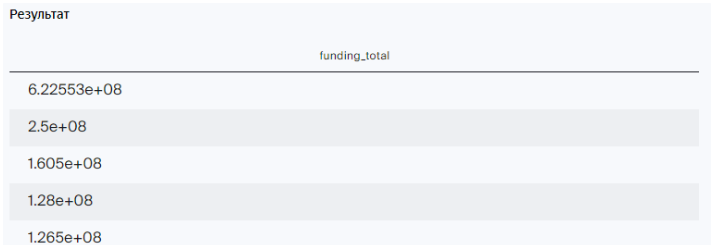

## 3/23 Найдите общую сумму сделок по покупке одних компаний другими в долларах. Отберите сделки, которые осуществлялись только за наличные с 2011 по 2013 год включительно.

In [ ]:
''' 
SELECT SUM(price_amount)
FROM acquisition
WHERE EXTRACT (year FROM CAST(acquired_at AS TIMESTAMP)) IN (2011, 2012, 2013)
AND term_code = 'cash'
'''

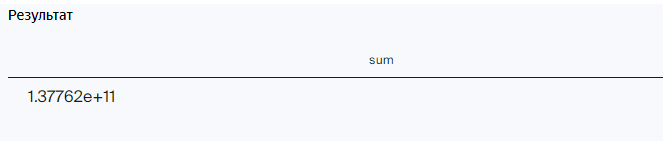

## 4/23 Отобразите имя, фамилию и названия аккаунтов людей в твиттере, у которых названия аккаунтов начинаются на `'Silver'`.

In [ ]:
'''
SELECT first_name, last_name, twitter_username
FROM people
WHERE twitter_username LIKE 'Silver%'
'''

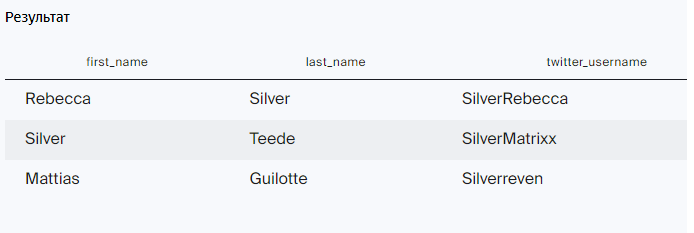

## 5/23 Выведите на экран всю информацию о людях, у которых названия аккаунтов в твиттере содержат подстроку 'money', а фамилия начинается на 'K'.

In [ ]:
'''
SELECT *
FROM people
WHERE twitter_username LIKE '%money%' AND last_name LIKE 'K%'
'''

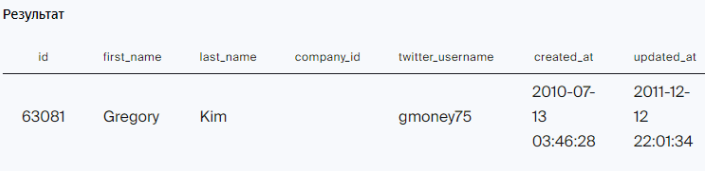

## 6/23 Для каждой страны отобразите общую сумму привлечённых инвестиций, которые получили компании, зарегистрированные в этой стране. Страну, в которой зарегистрирована компания, можно определить по коду страны. Отсортируйте данные по убыванию суммы.

In [ ]:
'''
SELECT country_code, SUM(funding_total)
FROM company
GROUP BY country_code
ORDER BY SUM(funding_total) DESC
'''

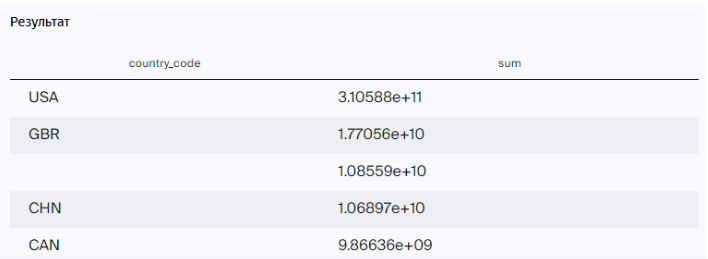

## 7/23 Составьте таблицу, в которую войдёт дата проведения раунда, а также минимальное и максимальное значения суммы инвестиций, привлечённых в эту дату. Оставьте в итоговой таблице только те записи, в которых минимальное значение суммы инвестиций не равно нулю и не равно максимальному значению.

In [ ]:
'''
SELECT funded_at, MIN(raised_amount), MAX(raised_amount)
FROM funding_round
GROUP BY funded_at
HAVING MIN(raised_amount) != 0 AND MIN(raised_amount) != MAX(raised_amount)
'''

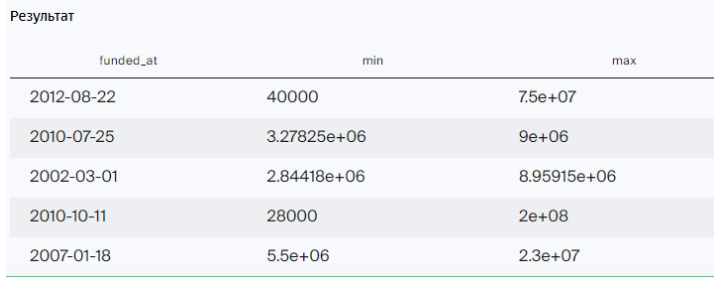

## 8/23 Создайте поле с категориями:

- Для фондов, которые инвестируют в 100 и более компаний, назначьте категорию `high_activity`.
- Для фондов, которые инвестируют в 20 и более компаний до 100, назначьте категорию `middle_activity`.
- Если количество инвестируемых компаний фонда не достигает 20, назначьте категорию `low_activity`.

Отобразите все поля таблицы `fund` и новое поле с категориями.

In [ ]:
'''
SELECT *,
       CASE
           WHEN invested_companies >= 100 THEN 'high_activity'
           WHEN invested_companies >= 20 THEN 'middle_activity'
           WHEN invested_companies < 20 THEN 'low_activity'
       END
FROM fund
'''

## 9/23 Для каждой из категорий, назначенных в предыдущем задании, посчитайте округлённое до ближайшего целого числа среднее количество инвестиционных раундов, в которых фонд принимал участие. Выведите на экран категории и среднее число инвестиционных раундов. Отсортируйте таблицу по возрастанию среднего.

In [ ]:
'''
SELECT 
       CASE
           WHEN invested_companies>=100 THEN 'high_activity'
           WHEN invested_companies>=20 THEN 'middle_activity'
           ELSE 'low_activity'
       END AS activity,
       ROUND(AVG(investment_rounds))
FROM fund
GROUP BY activity
ORDER BY round
'''

## 10/23 Выгрузите таблицу с десятью самыми активными инвестирующими странами. Активность страны определите по среднему количеству компаний, в которые инвестируют фонды этой страны.

Для каждой страны посчитайте минимальное, максимальное и среднее число компаний, в которые инвестировали фонды, основанные с 2010 по 2012 год включительно.

Исключите из таблицы страны с фондами, у которых минимальное число компаний, получивших инвестиции, равно нулю. Отсортируйте таблицу по среднему количеству компаний от большего к меньшему.

Для фильтрации диапазона по годам используйте оператор `BETWEEN`.

In [ ]:
'''
SELECT country_code, MIN(invested_companies), MAX(invested_companies), AVG(invested_companies)
FROM fund
WHERE EXTRACT (YEAR FROM CAST(founded_at AS TIMESTAMP)) BETWEEN 2010 AND 2012
GROUP BY country_code
HAVING MIN(invested_companies) > 0
ORDER BY AVG(invested_companies) DESC
LIMIT 10
'''

## 11/23 Отобразите имя и фамилию всех сотрудников стартапов. Добавьте поле с названием учебного заведения, которое окончил сотрудник, если эта информация известна.

In [ ]:
'''
SELECT first_name, last_name, education.instituition
FROM people
LEFT JOIN education ON  education.person_id = people.id
'''

## 12/23 Для каждой компании найдите количество учебных заведений, которые окончили её сотрудники. Выведите название компании и число уникальных названий учебных заведений. Составьте топ-5 компаний по количеству университетов.

In [ ]:
'''
SELECT company.name, COUNT (DISTINCT education.instituition) AS inst_count
FROM people
LEFT JOIN company ON company.id =  people.company_id
LEFT JOIN education ON people.id = education.person_id
GROUP BY company.name
HAVING name IS NOT NULL
ORDER BY inst_count DESC
LIMIT 5
'''

## 13/23 Составьте список с уникальными названиями закрытых компаний, для которых первый раунд финансирования оказался последним.

In [ ]:
'''
SELECT DISTINCT name
FROM company
LEFT JOIN funding_round ON funding_round.company_id = company.id
WHERE status = 'closed' AND is_first_round = 1 AND is_last_round = 1
'''

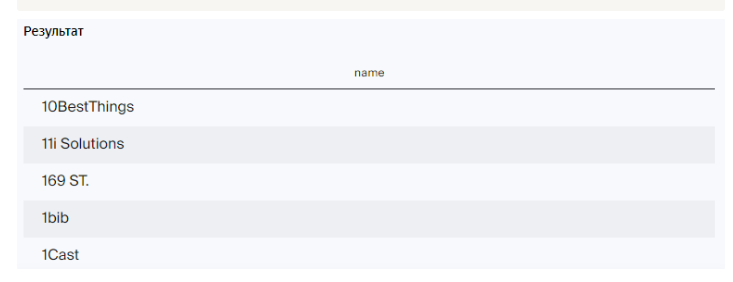

## 14/23 Составьте список уникальных номеров сотрудников, которые работают в компаниях, отобранных в предыдущем задании.

In [ ]:
'''
SELECT DISTINCT people.id
FROM people
JOIN company ON people.company_id = company.id
WHERE company.name IN (SELECT DISTINCT name
    FROM company
    LEFT JOIN funding_round ON funding_round.company_id = company.id
    WHERE status = 'closed' AND is_first_round = 1 AND is_last_round = 1)
'''

## 15/23 Составьте таблицу, куда войдут уникальные пары с номерами сотрудников из предыдущей задачи и учебным заведением, которое окончил сотрудник.

In [ ]:
'''
SELECT people.id, instituition
FROM people
LEFT JOIN education ON education.person_id = people.id
WHERE people.id IN 
    (SELECT DISTINCT people.id
    FROM people
    JOIN company ON people.company_id = company.id
    WHERE company.name IN (SELECT DISTINCT name
        FROM company
        LEFT JOIN funding_round ON funding_round.company_id = company.id
        WHERE status = 'closed' AND is_first_round = 1 AND is_last_round = 1))
GROUP BY people.id, instituition
HAVING instituition IS NOT NULL
'''

## 16/23 Посчитайте количество учебных заведений для каждого сотрудника из предыдущего задания.

In [ ]:
'''
SELECT p.id,
COUNT(e.instituition) AS total_instituition 
FROM people AS p JOIN education AS e ON p.id = e.person_id 
WHERE company_id in (SELECT id 
FROM company 
WHERE id in (SELECT company_id 
FROM funding_round 
WHERE is_first_round = 1 AND is_last_round = 1) 
AND status = 'closed') 
GROUP BY p.id;
'''

## 17/23 Дополните предыдущий запрос и выведите среднее число учебных заведений, которые окончили сотрудники разных компаний. Нужно вывести только одну запись, группировка здесь не понадобится.

In [ ]:
'''
WITH S AS 
(SELECT p.id,
COUNT(e.instituition) AS total_instituition 
FROM people AS p JOIN education AS e ON p.id = e.person_id 
WHERE company_id in (SELECT id 
FROM company 
WHERE id in (SELECT company_id 
FROM funding_round 
WHERE is_first_round = 1 AND is_last_round = 1) 
AND status = 'closed') 
GROUP BY p.id)
SELECT AVG (total_instituition)
FROM s
'''

## 18/23 Напишите похожий запрос: выведите среднее число учебных заведений, которые окончили сотрудники компании Facebook.

In [ ]:
'''
WITH S AS
(SELECT people.id, COUNT(education.instituition)
FROM people
LEFT JOIN company ON people.company_id = company.id
JOIN education ON people.id = education.person_id
WHERE company.name = 'Facebook'
GROUP BY people.id)
SELECT AVG(count)
FROM S
'''

## 19/23  Составьте таблицу из полей:

- `name_of_fund` — название фонда;
- `name_of_company` — название компании;
- `amount` — сумма инвестиций, которую привлекла компания в раунде.

В таблицу войдут данные о компаниях, в истории которых было больше шести важных этапов, а раунды финансирования проходили с 2012 по 2013 год включительно.

In [ ]:
'''
select f.name as name_of_fund, 
company.name as name_of_company,
fr.raised_amount as amount
 
from investment as i
inner join company as company on i.company_id = company.id
inner join fund as f on  f.id = i.fund_id 
inner join funding_round as fr on i.funding_round_id = fr.id
 
where extract (year from cast(fr.funded_at as date)) 
BETWEEN '2012' AND '2013' and  company.milestones > 6
'''

## 20/23 Выгрузите таблицу, в которой будут такие поля:

- название компании-покупателя;
- сумма сделки;
- название компании, которую купили;
- сумма инвестиций, вложенных в купленную компанию;
- доля, которая отображает, во сколько раз сумма покупки превысила сумму вложенных в компанию инвестиций, округлённая до ближайшего целого числа.

Не учитывайте те сделки, в которых сумма покупки равна нулю. Если сумма инвестиций в компанию равна нулю, исключите такую компанию из таблицы.

Отсортируйте таблицу по сумме сделки от большей к меньшей, а затем по названию купленной компании в алфавитном порядке. Ограничьте таблицу первыми десятью записями.

In [ ]:
'''
SELECT pokupatel.name AS pokupatel,
       acquisition.price_amount AS suma_pokupki,
       prodano.name AS prodano,
       prodano.funding_total AS invest,
       ROUND(acquisition.price_amount / prodano.funding_total) AS coef
FROM acquisition
LEFT JOIN company AS pokupatel ON pokupatel.id = acquisition.acquiring_company_id
LEFT JOIN company AS prodano ON prodano.id = acquisition.acquired_company_id
WHERE price_amount > 0
  AND prodano.funding_total > 0
ORDER BY acquisition.price_amount DESC
LIMIT 10
'''

## 21/23 Выгрузите таблицу, в которую войдут названия компаний из категории `social`, получившие финансирование с 2010 по 2013 год. Выведите также номер месяца, в котором проходил раунд финансирования.

In [ ]:
'''
SELECT company.name,
       EXTRACT(MONTH FROM CAST(funding_round.funded_at AS TIMESTAMP)) AS raund_month
FROM company
LEFT JOIN funding_round ON company.id = funding_round.company_id
WHERE category_code = 'social'
  AND EXTRACT(YEAR FROM CAST(funding_round.funded_at AS TIMESTAMP)) BETWEEN 2010 AND 2013
'''

## 22/23  Отберите данные по месяцам с 2010 по 2013 год, когда проходили инвестиционные раунды. Сгруппируйте данные по номеру месяца и получите таблицу, в которой будут поля:

- номер месяца, в котором проходили раунды;
- количество уникальных названий фондов из США, которые инвестировали в этом месяце;
- количество компаний, купленных за этот месяц;
- общая сумма сделок по покупкам в этом месяце.

In [ ]:
'''
WITH USA_fonds_count AS (
    SELECT EXTRACT(MONTH FROM funding_round.funded_at) AS month_no, 
        COUNT(DISTINCT fund.name) AS USA_fonds
       
FROM fund
INNER JOIN investment ON fund.id = investment.fund_id
INNER JOIN funding_round ON investment.funding_round_id = funding_round.id
WHERE EXTRACT(YEAR FROM funding_round.funded_at) BETWEEN 2010 AND 2013
  AND fund.country_code = 'USA'
GROUP BY EXTRACT(MONTH FROM funding_round.funded_at)
    ),
    
buy_counts AS (
SELECT EXTRACT (month FROM CAST (acquired_at AS TIMESTAMP)) AS month_no, 
       COUNT (acquired_company_id) AS buy_count
FROM acquisition
WHERE EXTRACT (year FROM CAST (acquired_at AS TIMESTAMP)) BETWEEN 2010 AND 2013
GROUP BY EXTRACT (month FROM CAST (acquired_at AS TIMESTAMP))
),

buy_sums AS (
SELECT EXTRACT (month FROM CAST (acquired_at AS TIMESTAMP)) AS month_no, SUM (price_amount) AS buy_sum
FROM acquisition
WHERE EXTRACT (year FROM CAST (acquired_at AS TIMESTAMP)) BETWEEN 2010 AND 2013
GROUP BY EXTRACT (month FROM CAST (acquired_at AS TIMESTAMP))
    )
    
SELECT buy_sums.month_no, USA_fonds_count.USA_fonds, buy_counts.buy_count, buy_sums.buy_sum
FROM buy_sums
LEFT JOIN USA_fonds_count ON buy_sums.month_no =USA_fonds_count.month_no 
LEFT JOIN buy_counts ON buy_sums.month_no =buy_counts.month_no
'''

## 23/23 Составьте сводную таблицу и выведите среднюю сумму инвестиций для стран, в которых есть стартапы, зарегистрированные в 2011, 2012 и 2013 годах. Данные за каждый год должны быть в отдельном поле. Отсортируйте таблицу по среднему значению инвестиций за 2011 год от большего к меньшему.

In [ ]:
'''
WITH year_2011 AS 
(
SELECT country_code, AVG(funding_total) AS avg_2011
FROM company
WHERE EXTRACT (YEAR FROM CAST (founded_at AS TIMESTAMP)) = 2011
GROUP BY country_code
    ),
year_2012 AS
(
SELECT country_code, AVG(funding_total) AS avg_2012
FROM company
WHERE EXTRACT (YEAR FROM CAST (founded_at AS TIMESTAMP)) = 2012
GROUP BY country_code
    ),
    
year_2013 AS
(
SELECT country_code, AVG(funding_total) AS avg_2013
FROM company
WHERE EXTRACT (YEAR FROM CAST (founded_at AS TIMESTAMP)) = 2013
GROUP BY country_code
    )
    
SELECT year_2011.country_code, year_2011.avg_2011, year_2012.avg_2012, year_2013.avg_2013
FROM year_2011
INNER JOIN year_2012 ON year_2011.country_code = year_2012.country_code
INNER JOIN year_2013 ON year_2011.country_code = year_2013.country_code
ORDER BY avg_2011 DESC
'''